# Data Modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

cleand_data_csv = 'data/cleaned_monthly.csv'
df = pd.read_csv(cleand_data_csv)
raw_df = df
df.shape

(925, 27)

In [2]:
df.head()

,Unnamed: 0,property_title,seller_id,seller_type,open_viewing,no_of_photos,available_from,available_for,area,furnished,...,Washing Machine,Serviced Property,Pets Allowed,Wheelchair Access,Central Heating,Microwave,Smoking,Dishwasher,House Alarm,Internet
0,0,"1 BED, Tallaght Cross West, Tallaght, Dublin 24",9871.0,1.0,0.0,3.0,2017-10-01,12.0,64.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,1,"1 Palace Street, Dublin 2, Dublin 2",7549.0,1.0,0.0,6.0,2017-09-15,12.0,53.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,2,"10 Clarinda House, Clarinda Park West, Dun Lao...",0.0,0.0,0.0,8.0,2017-09-18,6.0,9.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,3,"109 Geraldstown Wood, Santry, Dublin 9",11.0,1.0,1.0,6.0,2017-09-13,12.0,55.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,4,"11 saunders house, spencer dock, Dublin 1, Dub...",0.0,0.0,0.0,10.0,2017-09-16,0.0,25.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
print(df.columns.values)

['Unnamed: 0' 'property_title' 'seller_id' 'seller_type' 'open_viewing'
 'no_of_photos' 'available_from' 'available_for' 'area' 'furnished'
 'bathrooms' 'beds' 'price' 'Parking' 'Cable Television' 'Dryer'
 'Garden / Patio / Balcony' 'Washing Machine' 'Serviced Property'
 'Pets Allowed' 'Wheelchair Access' 'Central Heating' 'Microwave' 'Smoking'
 'Dishwasher' 'House Alarm' 'Internet']


In [4]:
features = ['seller_id','seller_type','open_viewing','no_of_photos','available_for','area','furnished','bathrooms',
            'beds','Parking','Cable Television','Dryer','Garden / Patio / Balcony','Washing Machine',
            'Serviced Property','Pets Allowed','Wheelchair Access','Central Heating','Microwave','Smoking','Dishwasher','House Alarm','Internet']

target = "price"

In [5]:

X = df[features]

Y = df[target]

In [6]:
X.shape

(925, 23)

In [7]:
Y.shape

(925,)

# Build Model with X & Y

## Trying Linear Regression

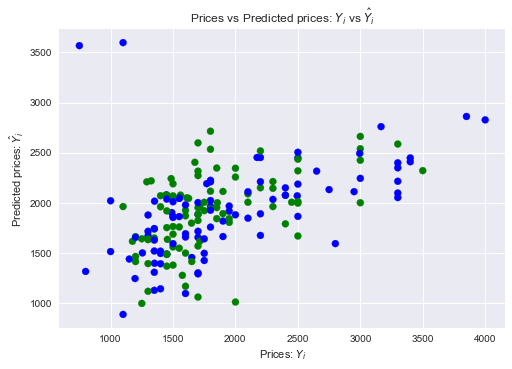

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred, color=['green','blue'])
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

## Looking for a good model using TPOT

In [9]:
from tpot import TPOTRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

tpot = TPOTRegressor(generations=10, population_size=50, verbosity=2)
tpot.fit(X_train, Y_train)
print(tpot.score(X_test, Y_test))
tpot.export('daft_rental_tpot.py')

/Users/heididuchting/anaconda/envs/dlnd/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Optimization Progress:  17%|█▋        | 93/550 [00:31<02:54,  2.63pipeline/s]

Generation 1 - Current best internal CV score: 172515.70891349274


Optimization Progress:  26%|██▌       | 141/550 [00:55<02:07,  3.20pipeline/s]

Generation 2 - Current best internal CV score: 172515.70891349274


Optimization Progress:  34%|███▍      | 186/550 [01:17<02:08,  2.83pipeline/s]

Generation 3 - Current best internal CV score: 142106.92134715384


Optimization Progress:  42%|████▏     | 231/550 [01:51<03:28,  1.53pipeline/s]

Generation 4 - Current best internal CV score: 142106.92134715384


Optimization Progress:  50%|█████     | 277/550 [02:30<01:50,  2.46pipeline/s]

Generation 5 - Current best internal CV score: 142106.92134715384


Optimization Progress:  58%|█████▊    | 319/550 [02:51<01:43,  2.22pipeline/s]

Generation 6 - Current best internal CV score: 142106.92134715384


Optimization Progress:  67%|██████▋   | 367/550 [03:18<01:20,  2.27pipeline/s]

Generation 7 - Current best internal CV score: 142106.92134715384


Optimization Progress:  75%|███████▌  | 415/550 [03:40<00:44,  3.05pipeline/s]

Generation 8 - Current best internal CV score: 142106.92134715384


Optimization Progress:  85%|████████▍ | 465/550 [03:55<00:19,  4.47pipeline/s]

Generation 9 - Current best internal CV score: 142106.92134715384


Generation 10 - Current best internal CV score: 141179.73494416487

Best pipeline: XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=2, XGBRegressor__min_child_weight=8, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=1.0)
159671.694073


In [10]:
## Trying Models suggested by TPOT

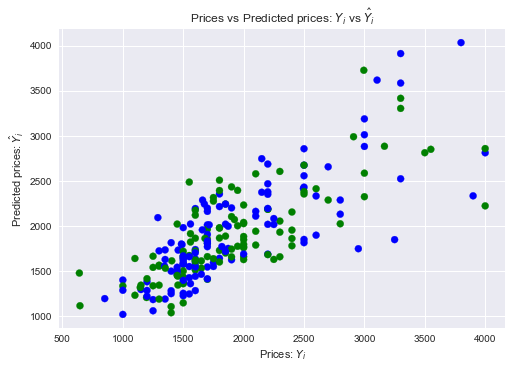

In [11]:
import numpy as np

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoLarsCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

training_features, testing_features, training_target, testing_target = \
    train_test_split(X, Y, random_state=42)

exported_pipeline = make_pipeline(
    StackingEstimator(estimator=GradientBoostingRegressor(
        alpha=0.99, 
        learning_rate=0.1, 
        loss="huber",
        max_depth=4, 
        max_features=0.55, 
        min_samples_leaf=14, 
        min_samples_split=16, 
        n_estimators=100, 
        subsample=0.9000000000000001)),
    LassoLarsCV(normalize=False)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)



plt.scatter(testing_target, results, color=['green','blue'])
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")


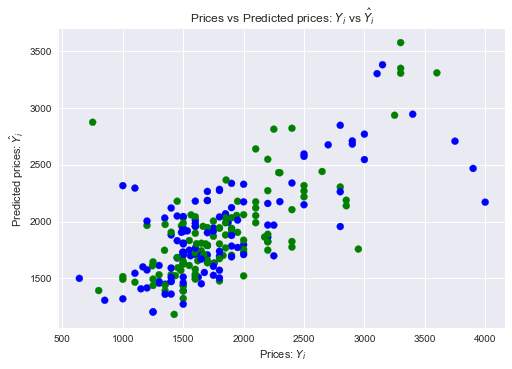

In [12]:
import numpy as np

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

training_features, testing_features, training_target, testing_target = \
    train_test_split(X, Y, random_state=88)
    

exported_pipeline = XGBRegressor(max_depth=4, min_child_weight=7, nthread=1, subsample=0.7500000000000001)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


plt.scatter(testing_target, results, color=['green','blue'])
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")